# Defining Prediction Tasks for Biomedical Text Mining

In [1]:
import json
import pandas as pd

# location for the datasets
data_dir = "./baseline/data"

## Loading PubMed Toxicogenomics Dataset

In [2]:
# PubMed training dataset from PubTator
with open(data_dir + "/train.json") as f:
    train_json = json.loads(f.read())

# validation split of 1521 examples (2%)
with open(data_dir + "/valid.json") as f:
    valid_json = json.loads(f.read())

# manually curated by biologists (1939)
with open(data_dir + "/test.json") as f:
    test_json = json.loads(f.read())

In [3]:
for doc in valid_json:
    title_length = len(doc['title'])
    for entity in doc['entity']:
        entity['label'] = entity.pop('type')

for doc in test_json:
    title_length = len(doc['title'])
    for entity in doc['entity']:
        entity['label'] = entity.pop('type')

In [4]:
# toxicogenomics interactions that are annotated in the dataset 
relation_map = json.loads(open(data_dir + "/relation_map.json").read())

## Biomedical Text Mining

In [481]:
import re

# 
abstracts = [doc['title']+" "+doc['abstract'] for doc in test_json]

pubmed = pd.DataFrame({'text': abstracts})

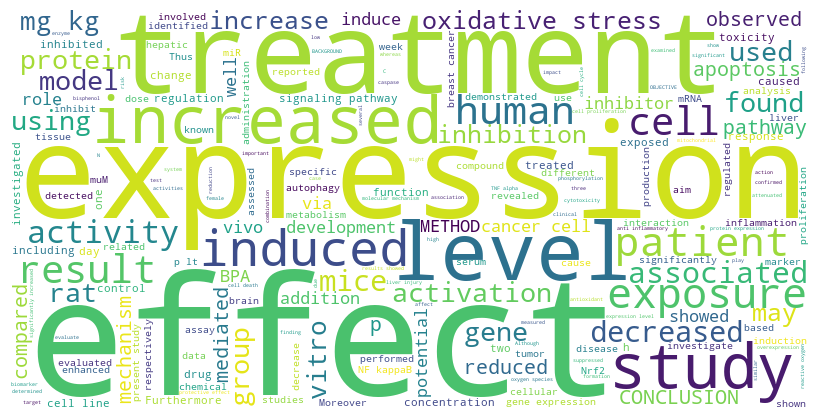

In [485]:
# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(abstracts)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
                     
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In biomedical text we will find common terms like "effect", "expression", and "treatment" as well as specialized jargon and abbreviations

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramonreszat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


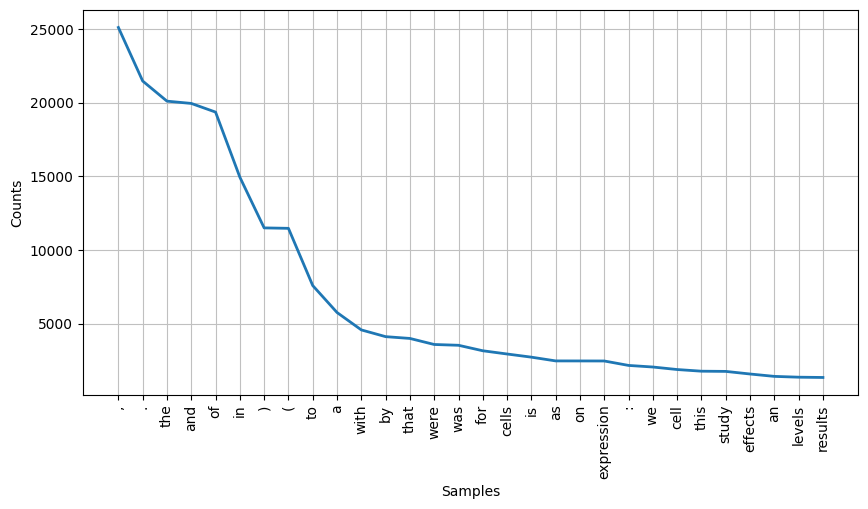

In [488]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# TODO: remove stopwords
tokens = word_tokenize(text.lower()) 
freq_dist = FreqDist(tokens)

plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)

plt.show()

## Entity Recognition

In [321]:
from spacy import displacy

doc = test_json[0]

doc_dict = {
    "title": doc['title'],
    "text": doc['title']+" "+doc['abstract'],
    "ents": doc['entity']
    }

entity_colors = {
    "Chemical": "#E9DF85", "Disease": "#ff6961", "Gene": "#85C1E9"
    }

displacy.render(doc_dict, manual=True, style="ent",
                 options={"colors": entity_colors})

## Topic Modelling

In [57]:
papers['text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))

papers['text_processed'] = \
papers['text_processed'].map(lambda x: x.lower())

In [58]:
papers['text_processed'].head()

0    mtor signalling: jack-of-all-trades 1 the mech...
1    hearing in paget's disease of bone introductio...
2    assessment of cannabinoids agonist and antagon...
3    epithelial il-6 trans-signaling defines a new ...
4    vitamin d3 supplementation improves testicular...
Name: text_processed, dtype: object

In [59]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramonreszat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [61]:
data = papers.text_processed.values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

In [67]:
print(data_words[:1][0][:30])

['mtor', 'signalling', 'jack', 'trades', 'mechanistic', 'target', 'rapamycin', 'mtor', 'evolutionarily', 'conserved', 'serine', 'threonine', 'kinase', 'senses', 'integrates', 'environmental', 'information', 'cellular', 'regulation', 'homeostasis', 'accumulating', 'evidence', 'suggested', 'master', 'role', 'mtor', 'signalling', 'many', 'fundamental', 'aspects']


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

documents = [' '.join(doc) for doc in data_words]

X = vectorizer.fit_transform(documents)

feature_names = np.array(vectorizer.get_feature_names_out())

In [461]:
min_threshold = 0.3
max_threshold = 1.0

filtered_words = feature_names[(np.max(X.toarray(), axis=0) > min_threshold) & (np.max(X.toarray(), axis=0) < max_threshold)]

filtered_words_set = set(filtered_words)

In [462]:
len(feature_names)

19182

In [463]:
len(filtered_words_set)

2738

In [464]:
filtered_words_set

{'hache',
 'solubilising',
 'finasteride',
 'onfh',
 'pdcd',
 'exergaming',
 'azelnidipine',
 'mov',
 'pathologies',
 'fecundity',
 'hcb',
 'exit',
 'ir',
 'road',
 'doses',
 'asd',
 'bo',
 'cisit',
 'mammary',
 'colon',
 'uptake',
 'phoenixin',
 'cocaine',
 'bac',
 'sorafenib',
 'bmal',
 'rice',
 'hcv',
 'pubertal',
 'escc',
 'licochalcone',
 'bd',
 'hc',
 'ecs',
 'bcd',
 'nanosheets',
 'reproductive',
 'res',
 'didymin',
 'isotopic',
 'cogan',
 'cftr',
 'limonin',
 'vegfa',
 'butyrate',
 'netosis',
 'ssd',
 'auriculasin',
 'oral',
 'osteoclast',
 'pris',
 'alzheimer',
 'sunflower',
 'palmitate',
 'ulk',
 'sxt',
 'rac',
 'loec',
 'mpp',
 'cae',
 'stiffness',
 'bronchoalveolar',
 'hg',
 'sol',
 'asarone',
 'pdl',
 'eralpha',
 'otos',
 'biopsies',
 'inos',
 'qacs',
 'noncardiac',
 'corilagin',
 'morin',
 'neonicotinoids',
 'titanium',
 'pyroptosis',
 'calycosin',
 'phenylethyl',
 'endotoxic',
 'fwep',
 'heparin',
 'shift',
 'depressive',
 'ph',
 'malat',
 'radicals',
 'psg',
 'psychiatr

In [465]:
filtered_documents = [[token for token in doc if token in filtered_words_set] for doc in data_words]
filtered_documents = [[token for token in doc if len(token) >= 5] for doc in filtered_documents]

In [466]:
filtered_documents[1]

['hearing',
 'hearing',
 'hearing',
 'group',
 'group',
 'group',
 'group',
 'group',
 'group',
 'hearing',
 'group',
 'hearing',
 'group',
 'hearing',
 'pressure',
 'hearing',
 'group',
 'hearing',
 'hearing']

In [467]:
papers

text  \
0     mTOR signalling: jack-of-all-trades 1. The mec...   
1     Hearing in Paget's disease of bone. INTRODUCTI...   
2     Assessment of Cannabinoids Agonist and Antagon...   
3     Epithelial IL-6 trans-signaling defines a new ...   
4     Vitamin D3 supplementation improves testicular...   
...                                                 ...   
1934  Early Gestational Exposure to Inhaled Ozone Im...   
1935  Evaluation of Anti-Inflammatory Components of ...   
1936  Gestational Cd Exposure in the CD-1 Mouse Indu...   
1937  Soiled airway tracheal intubation and the effe...   
1938  Antimicrobial Titanium Surface via Click-Immob...   

                                         text_processed  
0     mtor signalling: jack-of-all-trades 1 the mech...  
1     hearing in paget's disease of bone introductio...  
2     assessment of cannabinoids agonist and antagon...  
3     epithelial il-6 trans-signaling defines a new ...  
4     vitamin d3 supplementation improves testicular...  
...                                                 ...  
1934  early gestational exposure to inhaled ozone im...  
1935  evaluation of anti-inflammatory components of ...  
1936  gestational cd exposure in the cd-1 mouse indu...  
1937  soiled airway tracheal intubation and the effe...  
1938  antimicrobial titanium surface via click-immob...  

[1939 rows x 2 columns]

In [468]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(filtered_documents)
# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3)]


In [469]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

In [470]:
# Print the Keyword in the 10 topics
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [471]:
lda_model.print_topics()

[(0,
  '0.033*"cancer" + 0.025*"alpha" + 0.017*"breast" + 0.016*"kappab" + 0.015*"liver" + 0.014*"estrogen" + 0.012*"concentrations" + 0.010*"group" + 0.009*"diabetes" + 0.009*"endothelial"'),
 (1,
  '0.030*"cancer" + 0.014*"caspase" + 0.014*"alpha" + 0.012*"growth" + 0.012*"mitochondrial" + 0.011*"injury" + 0.010*"bisphenol" + 0.010*"kidney" + 0.010*"methylation" + 0.010*"brain"'),
 (2,
  '0.051*"liver" + 0.027*"injury" + 0.024*"group" + 0.022*"alpha" + 0.021*"hepatic" + 0.014*"cancer" + 0.013*"autophagy" + 0.013*"fibrosis" + 0.012*"concentrations" + 0.011*"glucose"'),
 (3,
  '0.040*"cancer" + 0.017*"alpha" + 0.015*"mitochondrial" + 0.014*"growth" + 0.013*"autophagy" + 0.012*"binding" + 0.011*"liver" + 0.009*"death" + 0.008*"delta" + 0.008*"drugs"'),
 (4,
  '0.034*"cancer" + 0.023*"group" + 0.014*"proteins" + 0.011*"kidney" + 0.010*"pulmonary" + 0.010*"death" + 0.009*"renal" + 0.008*"gamma" + 0.008*"weight" + 0.008*"alpha"')]

## Relation Extraction

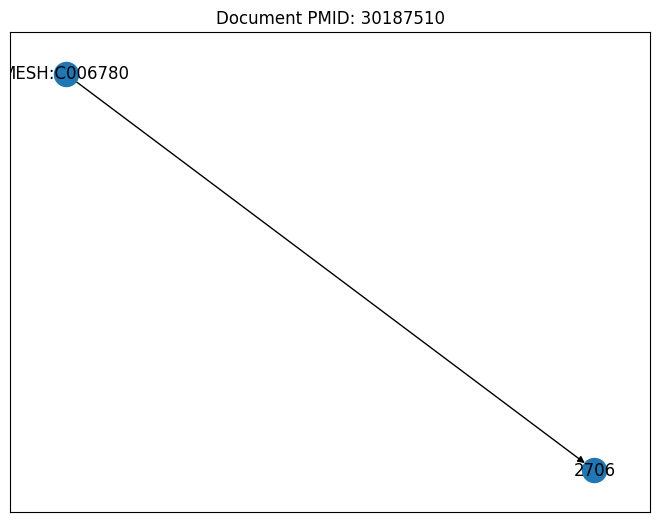

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

source, target, relations = [], [], []

for rel in doc['relation']:
    source.append(rel['subj'])
    target.append(rel['obj'])
    relations.append(rel['type'])
    
graph_df = pd.DataFrame({'source_id':source, 
        'target_id':target, 'edge_id':relations})

G=nx.from_pandas_edgelist(graph_df, "source_id", "target_id", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

pos = nx.spring_layout(G, seed=42)

nx.draw(G, with_labels=True, pos=pos)
plt.title('Document PMID: '+doc['docid'])
plt.axis('on')

plt.show()

In [9]:
doc['relation']

[{'type': 'chem_gene:decreases^expression',
  'subj': 'MESH:C006780',
  'obj': '2706'}]

## Manual Curation

Construct a network representation from the corpus of 523 abstracts, with entity mentions from PubTator Central that were *manually curated* by a team of biologists.

In [15]:
# collect information for network analysis
docids, source, target, relations = [], [], [], []
e1_names, e2_names, e1_type, e2_type = [], [], [], []

for doc in test_json:
    for rel in doc['relation']:
        docids.append(doc['docid'])
        source.append(rel['subj'])
        # 
        result = [item for item in doc['entity'] if item['id'] == rel['subj']]
        e1_names.append(result[0]['mention'])
        e1_type.append(result[0]['label'])

        target.append(rel['obj'])

        result = [item for item in doc['entity'] if item['id'] == rel['obj']]
        e2_names.append(result[0]['mention'])
        e2_type.append(result[0]['label'])

        relations.append(rel['type'])
    

# constructing a knowledge graph 
kg_df = pd.DataFrame({'document': docids, 'source_id':source, 'source_name': e1_names, 'source_type': e1_type,
                        'target_id':target, 'target_name': e2_names, 'target_type': e2_type,
                         'edge_id':relations})

In [16]:
kg_df

document     source_id         source_name source_type     target_id  \
0     29883990  MESH:C103505               AM251    Chemical          1268   
1     29883990  MESH:C103505               AM251    Chemical          4313   
2     29902480          3569                IL-6        Gene  MESH:D001249   
3     29953732  MESH:D013311      streptozotocin    Chemical  MESH:D005355   
4     30020114  MESH:D001564      benzo(a)pyrene    Chemical           595   
...        ...           ...                 ...         ...           ...   
5111  33146391  MESH:D010126               Ozone    Chemical          2321   
5112  33146391  MESH:D010126               Ozone    Chemical          4319   
5113  33149750  MESH:D008070  Lipopolysaccharide    Chemical          5742   
5114  33259630  MESH:D002104                  Cd    Chemical  MESH:D009765   
5115  33259630  MESH:D002104                  Cd    Chemical  MESH:D024821   

                           target_name target_type  \
0                                  CB1        Gene   
1     matrix metalloproteinase (MMP) 2        Gene   
2                               asthma     Disease   
3                             fibrosis     Disease   
4                             cyclinD1        Gene   
...                                ...         ...   
5111        FMS-like tyrosine kinase-1        Gene   
5112                             mmp10        Gene   
5113                  cyclooxygenase-1        Gene   
5114                           obesity     Disease   
5115                Metabolic Syndrome     Disease   

                             edge_id  
0       chem_gene:decreases^activity  
1     chem_gene:increases^expression  
2      gene_disease:marker/mechanism  
3      chem_disease:marker/mechanism  
4     chem_gene:increases^expression  
...                              ...  
5111   chem_gene:increases^transport  
5112  chem_gene:decreases^expression  
5113  chem_gene:increases^expression  
5114   chem_disease:marker/mechanism  
5115   chem_disease:marker/mechanism  

[5116 rows x 8 columns]

In [10]:
kg_df.to_csv(data_dir + "/test_kg.txt", sep='\t', index=False)

In [11]:
# What can i do with this graph?
# 1. Analyze clusters in the gene-disease network
# 2. Align parts of the network with Wikipathways